<a href="https://colab.research.google.com/github/Feev004/Colab_Artifical_Intelligence/blob/main/Dormitory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

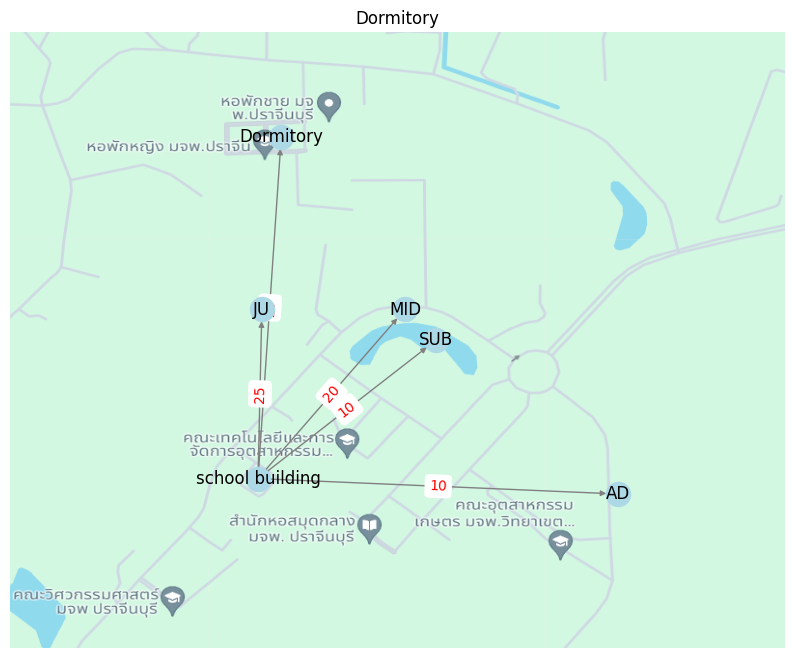

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Create a graph with position and distances
position = ['Dormitory', 'school building', 'AD', 'MID', 'JU', 'SUB']
distances = {
    ('school building', 'AD'): 10,
    ('school building', 'Dormitory'): 15,
    ('school building', 'MID'): 20,
    ('school building', 'JU'): 25,
    ('school building', 'SUB'): 10
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes (position)
G.add_nodes_from(position)

# Add weighted edges (distances)
for (point1, point2), distance in distances.items():
    G.add_edge(point1, point2, weight=distance)
    # Note: Only add edge in one direction to keep it directed

# Load the background image
img = mpimg.imread('Dormitory.png')  # Replace 'Dormitory.jpg' with your image path

# Define positions of the nodes manually to fit the image
pos = {
    'school building': (-0.36, -0.45),  #(v,h)
    'AD': (0.57, -0.5),
    'Dormitory': (-0.3, 0.66),
    'MID': (0.02, 0.1),
    'JU': (-0.35, 0.1),
    'SUB': (0.1, 0)
}

# Create the plot
plt.figure(figsize=(10, 8))

# Display the image
plt.imshow(img, extent=[-1, 1, -1, 1], aspect='auto')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, edge_color='grey', arrowsize=8, connectionstyle='arc3, rad=0')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}, font_color='red')
plt.title("Dormitory")
plt.show()
